<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Defining-the-Color-Palette" data-toc-modified-id="Defining-the-Color-Palette-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Defining the Color Palette</a></span></li><li><span><a href="#Correlation-Ratio-Metrics" data-toc-modified-id="Correlation-Ratio-Metrics-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Correlation Ratio Metrics</a></span><ul class="toc-item"><li><span><a href="#Plot-3-Matrices" data-toc-modified-id="Plot-3-Matrices-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Plot 3 Matrices</a></span></li><li><span><a href="#Plot-2-Correlation-Ratio-Matrices" data-toc-modified-id="Plot-2-Correlation-Ratio-Matrices-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Plot 2 Correlation Ratio Matrices</a></span></li><li><span><a href="#Plot-5-Matrices" data-toc-modified-id="Plot-5-Matrices-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Plot 5 Matrices</a></span></li></ul></li><li><span><a href="#Plot-Correlation-Ratio-Cohort-Overview" data-toc-modified-id="Plot-Correlation-Ratio-Cohort-Overview-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot Correlation Ratio Cohort Overview</a></span><ul class="toc-item"><li><span><a href="#Plot-the-correlation-stats-for-the-original-and-2-other-methods" data-toc-modified-id="Plot-the-correlation-stats-for-the-original-and-2-other-methods-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Plot the correlation stats for the original and 2 other methods</a></span></li><li><span><a href="#Plot-the-correlation-ratio-means-and-standard-deviations-for-all-5-images" data-toc-modified-id="Plot-the-correlation-ratio-means-and-standard-deviations-for-all-5-images-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Plot the correlation ratio means and standard deviations for all 5 images</a></span></li></ul></li><li><span><a href="#Plot-correlation-statistics-for-before/after-registration" data-toc-modified-id="Plot-correlation-statistics-for-before/after-registration-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot correlation statistics for before/after registration</a></span></li><li><span><a href="#Calculate-Various-Metrics" data-toc-modified-id="Calculate-Various-Metrics-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Calculate Various Metrics</a></span><ul class="toc-item"><li><span><a href="#Mean-and-standard-deviation-of-correlation-ratio-for-a-single-file" data-toc-modified-id="Mean-and-standard-deviation-of-correlation-ratio-for-a-single-file-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Mean and standard deviation of correlation ratio for a single file</a></span></li><li><span><a href="#Mean-and-standard-deviation-of-correlation-ratio-for-a-set-of-files" data-toc-modified-id="Mean-and-standard-deviation-of-correlation-ratio-for-a-set-of-files-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Mean and standard deviation of correlation ratio for a set of files</a></span></li></ul></li></ul></li><li><span><a href="#Preprocess-Correlation-Ratio-Matrix-Files" data-toc-modified-id="Preprocess-Correlation-Ratio-Matrix-Files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocess Correlation Ratio Matrix Files</a></span><ul class="toc-item"><li><span><a href="#Specify-the-correlation-matrix-files" data-toc-modified-id="Specify-the-correlation-matrix-files-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Specify the correlation matrix files</a></span></li><li><span><a href="#Check-the-linear/nonlinear-original-images" data-toc-modified-id="Check-the-linear/nonlinear-original-images-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Check the linear/nonlinear original images</a></span></li><li><span><a href="#Sort-the-files" data-toc-modified-id="Sort-the-files-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Sort the files</a></span></li></ul></li><li><span><a href="#Generate-Average-Correlation-Ratio-Barplot-Figures" data-toc-modified-id="Generate-Average-Correlation-Ratio-Barplot-Figures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate Average Correlation Ratio Barplot Figures</a></span><ul class="toc-item"><li><span><a href="#Plot-the-correlation-ratio-stats-for-the-cohort---affine" data-toc-modified-id="Plot-the-correlation-ratio-stats-for-the-cohort---affine-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot the correlation ratio stats for the cohort - affine</a></span></li><li><span><a href="#Plot-the-correlation-ratio-stats-for-the-cohort---affine+nonlinear" data-toc-modified-id="Plot-the-correlation-ratio-stats-for-the-cohort---affine+nonlinear-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plot the correlation ratio stats for the cohort - affine+nonlinear</a></span></li><li><span><a href="#Plot-the-correlation-ratio-stats-for-the-cohort---affine-and-affine+nonlinear" data-toc-modified-id="Plot-the-correlation-ratio-stats-for-the-cohort---affine-and-affine+nonlinear-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plot the correlation ratio stats for the cohort - affine and affine+nonlinear</a></span></li></ul></li><li><span><a href="#Generate-Correlation-Ratio-Matrices" data-toc-modified-id="Generate-Correlation-Ratio-Matrices-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generate Correlation Ratio Matrices</a></span><ul class="toc-item"><li><span><a href="#Determine-the-colormap-range" data-toc-modified-id="Determine-the-colormap-range-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Determine the colormap range</a></span></li><li><span><a href="#Plot-figures-with-3-matrices" data-toc-modified-id="Plot-figures-with-3-matrices-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot figures with 3 matrices</a></span><ul class="toc-item"><li><span><a href="#Subject-0:-Highest-original-average-correlation-ratio" data-toc-modified-id="Subject-0:-Highest-original-average-correlation-ratio-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Subject 0: Highest original average correlation ratio</a></span><ul class="toc-item"><li><span><a href="#Affine" data-toc-modified-id="Affine-5.2.1.1"><span class="toc-item-num">5.2.1.1&nbsp;&nbsp;</span>Affine</a></span></li><li><span><a href="#Affine+nonlinear" data-toc-modified-id="Affine+nonlinear-5.2.1.2"><span class="toc-item-num">5.2.1.2&nbsp;&nbsp;</span>Affine+nonlinear</a></span></li></ul></li><li><span><a href="#Subject-7:-Median-original-average-correlation-ratio" data-toc-modified-id="Subject-7:-Median-original-average-correlation-ratio-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Subject 7: Median original average correlation ratio</a></span><ul class="toc-item"><li><span><a href="#Affine" data-toc-modified-id="Affine-5.2.2.1"><span class="toc-item-num">5.2.2.1&nbsp;&nbsp;</span>Affine</a></span></li><li><span><a href="#Affine+nonlinear" data-toc-modified-id="Affine+nonlinear-5.2.2.2"><span class="toc-item-num">5.2.2.2&nbsp;&nbsp;</span>Affine+nonlinear</a></span></li></ul></li><li><span><a href="#Subject-16:-Lowest-original-average-correlation-ratio" data-toc-modified-id="Subject-16:-Lowest-original-average-correlation-ratio-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Subject 16: Lowest original average correlation ratio</a></span><ul class="toc-item"><li><span><a href="#Affine" data-toc-modified-id="Affine-5.2.3.1"><span class="toc-item-num">5.2.3.1&nbsp;&nbsp;</span>Affine</a></span></li><li><span><a href="#Affine+nonlinear" data-toc-modified-id="Affine+nonlinear-5.2.3.2"><span class="toc-item-num">5.2.3.2&nbsp;&nbsp;</span>Affine+nonlinear</a></span></li></ul></li></ul></li><li><span><a href="#Plot-figures-with-5-matrices" data-toc-modified-id="Plot-figures-with-5-matrices-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Plot figures with 5 matrices</a></span><ul class="toc-item"><li><span><a href="#Subject-0:-highest-original-average-correlation-ratio" data-toc-modified-id="Subject-0:-highest-original-average-correlation-ratio-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Subject 0: highest original average correlation ratio</a></span></li><li><span><a href="#Subject-7:-median-original-average-correlation-ratio" data-toc-modified-id="Subject-7:-median-original-average-correlation-ratio-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Subject 7: median original average correlation ratio</a></span></li><li><span><a href="#Subject-16:-lowest-original-average-correlation-ratio" data-toc-modified-id="Subject-16:-lowest-original-average-correlation-ratio-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Subject 16: lowest original average correlation ratio</a></span></li></ul></li></ul></li><li><span><a href="#Generate-correlation-ratio-matrix-figures-to-show-different-types-of-motion" data-toc-modified-id="Generate-correlation-ratio-matrix-figures-to-show-different-types-of-motion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generate correlation ratio matrix figures to show different types of motion</a></span><ul class="toc-item"><li><span><a href="#Effect-Type-D:-No-Effect" data-toc-modified-id="Effect-Type-D:-No-Effect-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Effect Type D: No Effect</a></span></li><li><span><a href="#Effect-Type-C:-Adverse-Effect-(increased-correlation-ratio-average)" data-toc-modified-id="Effect-Type-C:-Adverse-Effect-(increased-correlation-ratio-average)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Effect Type C: Adverse Effect (increased correlation ratio average)</a></span></li><li><span><a href="#Effect-Type-B:-Positive-Effect-II-(standard-deviation-reduction)" data-toc-modified-id="Effect-Type-B:-Positive-Effect-II-(standard-deviation-reduction)-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Effect Type B: Positive Effect II (standard deviation reduction)</a></span></li><li><span><a href="#Effect-Type-A:-Positive-Effect-I-(reduction-in-mean-and-standard-deviation)" data-toc-modified-id="Effect-Type-A:-Positive-Effect-I-(reduction-in-mean-and-standard-deviation)-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Effect Type A: Positive Effect I (reduction in mean and standard deviation)</a></span></li><li><span><a href="#Before/After-Registration-Correlation-Ratio-Statistics-Plots" data-toc-modified-id="Before/After-Registration-Correlation-Ratio-Statistics-Plots-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Before/After Registration Correlation Ratio Statistics Plots</a></span></li></ul></li></ul></div>

# Imports

Purpose of this document: make figures for the DAG-based global volume registration framework project

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
baseDir = '/home/jenna/Research/CHP-PIRC/markov-movement-correction/data/'
sns.set_style("white")

# Functions

## Defining the Color Palette

Use seaborn to define the color palette for all figure generating functions

In [3]:
def defineColorPalette():
    """
    Use the seaborn library to define a better looking color palette.
    
    Currently takes no inputs, but that might change as I make more
    palettes
    
    Returns:
    - palette: the seaborn palette defined
    """
    # try using the xkcd_rgb colors
    # want 6 colors
    colors = ['blue', 'cherry red', 'golden yellow', 'vibrant green', 'violet', 'pumpkin orange']
    palette = sns.xkcd_palette(colors)
    
    return palette

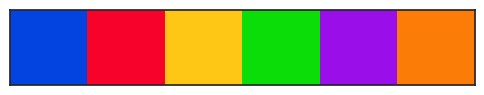

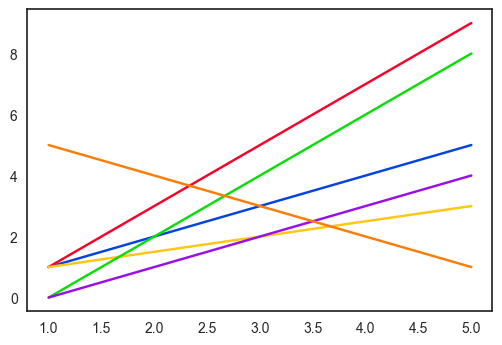

In [4]:
palette = defineColorPalette()
sns.palplot(palette)

# test plot
x = [1, 2, 3, 4, 5]
y1 = [1, 2, 3, 4, 5]
y2 = [1, 3, 5, 7, 9]
y3 = [1, 1.5, 2, 2.5, 3]
y4 = [0, 2, 4, 6, 8]
y5 = [0, 1, 2, 3, 4]
y6 = [5, 4, 3, 2, 1]

fig = plt.figure()
sns.set_palette(palette)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.show()

## Correlation Ratio Metrics

### Plot 3 Matrices 

Choose the original and 2 for which you want to compare the criteria

In [5]:
def plotCorrelationMatrices3GivenCMapRange(fn1, fn2, fn3, cmapMin, cmapMax,
                          title1="Cross Correlation Matrix 1",
                          title2="Cross Correlation Matrix 2",
                          title3="Cross Correlation Matrix 3",
                          outFn=""):
    """    
    Takes 3 filenames, colormap min and max values, 3 graph titles, and an output filename
    
    Read in the correlation ratio matrices from the files
    Plot all 3 correlation ratio matrices in 1 figure following the layout
    
       title1       title2       title3
    +---------+  +---------+  +---------+  +-+
    |         |  |         |  |         |  | |
    |         |  |         |  |         |  | |
    |    1    |  |    2    |  |    3    |  | |
    |         |  |         |  |         |  | |
    |         |  |         |  |         |  | |
    +---------+  +---------+  +---------+  +-+
    
    where the bar on the side is the colorbar
    
    If an output function is specified, save the graph to a file.
    
    Inputs:
    - fn1, fn2, fn3: the filenames of the correlation matrices
    - cmapMin: min value for the colormap
    - cmapMax: max value for the colormap
    - title1, title2, title3 (optional): title to label each correlation ratio matrix
        *** Highly suggested that the user specifies the title as the defaults are nondescriptive
    - outFn (optional): output filename; if specified, save the figure to this file
    
    Returns:
    - nothing
    
    Effects:
    - displays the correlation matrices in the notebook
    - if outFn is specified, save the figure to a file
    """
    # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')
    mat3 = np.loadtxt(open(fn3, 'r'), delimiter=',')
          
    # make a new figure
    fig = plt.figure(figsize=(14,5))
   
    # subplot 1: correlation matrix 1
    ax1 = fig.add_subplot(131)
    cax1 = ax1.matshow(mat1, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(title1)
    
    # subplot 2: correlation matrix 2
    ax2 = fig.add_subplot(132)
    cax2 = ax2.matshow(mat2, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_title(title2)
    
    # subplot 3: correlation matrix 3
    ax3 = fig.add_subplot(133)
    cax3 = ax3.matshow(mat3, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax3.xaxis.set_ticks_position('bottom')
    ax3.set_title(title3)
        
    # add the colorbar
    # fig.subplots_adjust(wspace=0, hspace=0.05) # needed to adjust the whitespace at one point, for future reference
    fig.colorbar(cax1, ax=[ax1, ax2, ax3])
    
    # show the figure in the notebook
    plt.show()
    
    # if the outFn argument is specified, save the figure to a file
    if not outFn == "":
        fig.savefig(outFn, bbox_inches='tight', dpi=600)
    

### Plot 2 Correlation Ratio Matrices

In [52]:
def plotCorrelationMatrices2GivenCMapRange(fn1, fn2, cmapMin, cmapMax,
                          title1="Correlation Matrix",
                          title2="Correlation Matrix",
                          outFn=""):
    """
    Takes 2 filenames, colormap min and max values, 1 graph titles, and an output filename
    
    Read in the correlation ratio matrices from the files
    Plot 2 correlation ratio matrices in 1 figure following the layout
    
    +---------+----+----+  +-+
    |         |         |  | |
    |         |         |  | |
    |    1    |    2    |  | |
    |         |         |  | |
    |         |         |  | |
    +---------+----+----+  +-+
    
    where the bar on the side is the colorbar
    
    If an output function is specified, save the graph to a file.
    
    Inputs:
    - fn1, fn2: the filenames of the correlation ratio matrices
    - cmapMin: minimum value to use for the colormap
    - cmapMax: maximum value to use for the colormap
    - title1, title2: titles to put on the graph for each matrix
    - outFn (optional): filename to save the figure to
    
    Returns:
    - nothing
    
    Effects:
    - displays the 2 correlation matrices in a single figure
    - if outFn is specified, save the figure to the specified filename
    """
     # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')
          
    # make a new figure
    fig = plt.figure(figsize=(14,5))
   
    # subplot 1: correlation matrix 1
    ax1 = fig.add_subplot(121)
    cax1 = ax1.matshow(mat1, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(title1)
    
    # subplot 2: correlation matrix 2
    ax2 = fig.add_subplot(122)
    cax2 = ax2.matshow(mat2, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_title(title2)
        
    # add the colorbar
    # fig.subplots_adjust(wspace=0, hspace=0.05) # needed to adjust the whitespace at one point, for future reference
    fig.colorbar(cax1, ax=[ax1, ax2])
    
    # show the figure in the notebook
    plt.show()
    
    # if the outFn argument is specified, save the figure to a file
    if not outFn == "":
        fig.savefig(outFn, bbox_inches='tight', dpi=600)
    
    

### Plot 5 Matrices

Choose the original plus 4 others. Designed to show the original (first) much larger than the other 4.

In [6]:
def plotCorrelationMatrices5GivenCMapRange(fn1, fn2, fn3, fn4, fn5, cmapMin, cmapMax,
                          title1="Correlation Matrix",
                          title2="Correlation Matrix",
                          title3="Correlation Matrix",
                          title4="Correlation Matrix",
                          title5="Correlation Matrix",
                          outFn=""):
    """
    Takes 5 filenames, colormap min and max values, 5 graph titles, and an output filename
    
    Read in the correlation ratio matrices from the files
    Plot all 5 correlation ratio matrices in 1 figure following the layout
    
    +---------+----+----+  +-+
    |         |    |    |  | |
    |         |  2 |  3 |  | |
    |    1    |----+----+  | |
    |         |    |    |  | |
    |         |  4 |  5 |  | |
    +---------+----+----+  +-+
    
    where the bar on the side is the colorbar
    
    If an output function is specified, save the graph to a file.
    
    Inputs:
    - fn1, fn2, fn3, fn4, fn5: the filenames of the correlation ratio matrices
    - cmapMin: minimum value to use for the colormap
    - cmapMax: maximum value to use for the colormap
    - title1, title2, title3, title4, title5: titles to put on the graph for each matrix
    - outFn (optional): filename to save the figure to
    
    Returns:
    - nothing
    
    Effects:
    - displays the 5 correlation matrices in a single figure
    - if outFn is specified, save the figure to the specified filename
    """
    
    # load the matrices
    mat1 = np.loadtxt(open(fn1, 'r'), delimiter=',')
    mat2 = np.loadtxt(open(fn2, 'r'), delimiter=',')
    mat3 = np.loadtxt(open(fn3, 'r'), delimiter=',')
    mat4 = np.loadtxt(open(fn4, 'r'), delimiter=',')
    mat5 = np.loadtxt(open(fn5, 'r'), delimiter=',')
          
    # make a new figure
    fig = plt.figure(figsize=(14,5))
    
    # set up subplots: split the space in half horizontally
    outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)
    
    # set up the subsubplots: keep the left half large and divide the right half into quadrants
    left = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0], wspace=0.1, hspace=0.2)
    right = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer[1], wspace=0.2, hspace=0.5)
    
    # display the first correlation ratio matrix (left half of figure)
    ax1 = plt.Subplot(fig, left[0])
    cax1 = ax1.matshow(mat1, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(title1)
    fig.add_subplot(ax1)
    
    # display the correlation ratio matrices from the registered images
    # subplot 2 (global affine)
    ax2 = plt.Subplot(fig, right[0])
    cax2 = ax2.matshow(mat2, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_title(title2)
    fig.add_subplot(ax2)
    
    # subplot 3 (global nonlinear)
    ax3 = plt.Subplot(fig, right[1])
    cax3 = ax3.matshow(mat3, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax3.xaxis.set_ticks_position('bottom')
    ax3.set_title(title3)
    fig.add_subplot(ax3)
    
    # subplot 4 (DAG affine)
    ax4 = plt.Subplot(fig, right[2])
    cax4 = ax4.matshow(mat4, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax4.xaxis.set_ticks_position('bottom')
    ax4.set_title(title4)
    fig.add_subplot(ax4)
    
    # subplot 5 (DAG nonlinear  )
    ax5 = plt.Subplot(fig, right[3])
    cax5 = ax5.matshow(mat5, cmap=plt.cm.gist_heat_r, vmin=cmapMin, vmax=cmapMax) # plasma_r looks cool, gist_heat_r is good
    ax5.xaxis.set_ticks_position('bottom')
    ax5.set_title(title5)
    fig.add_subplot(ax5)
        
    # add the colorbar
    fig.colorbar(cax1, ax=[ax1, ax2, ax3, ax4, ax5])
    
    # show the figure in the notebook
    plt.show()
    
    # if the outFn is specified, save the figure to the file
    if not outFn == "":
        fig.savefig(outFn, bbox_inches='tight', dpi=600)
    

## Plot Correlation Ratio Cohort Overview

### Plot the correlation stats for the original and 2 other methods

In [7]:
def plotCorrelationStatsThree(fns, outFn=''):
    """
    Given a list of 3 lists of filenames, 
    
    Inputs:
    - fns: list of lists of filenames
    - outFn (optional): if this string is specified, save the figure to this filename
    
    Returns: None
    
    Effects:
    - Plot boxplots with mean and standard deviation lines for
      three methods for all subjects
    - If outFn is specified, save the figure
    """
    # initializing variables
    titles = ['Original Sequences',
              'Traditional Registration',
              'DAG-based Registration']
    means = []
    stds = []
    
    # calculate the mean and standard deviation lines
    for i in xrange(len(fns[0])):
        subjFns = [fns[0][i], fns[1][i], fns[2][i]]  # collect the filename associated with a subject
        ms = [0.0, 0.0, 0.0]
        ss = [0.0, 0.0, 0.0]
    
        # calculate the values
        for j in xrange(len(subjFns)):
            m, s = calculateCorrelationRatioStats(subjFns[j])
            ms[j] = m
            ss[j] = s

        means.append(np.mean(ms))
        stds.append(np.mean(ss))
    
    # turn the standard deviations into upper/lower boundary lines
    upper = [means[i]+stds[i] for i in xrange(len(stds))]
    lower = [means[i]-stds[i] for i in xrange(len(stds))]
    
    fig = plt.figure(figsize=(10,6))
    
    # set the color palette
    colors = ['blue', 'bright red', 'yellowish orange']
    palette = sns.xkcd_palette(colors)
    sns.set_palette(palette)
    
    # plot the lines
    x = range(len(means))
    x = [i+1 for i in x]
    c = sns.xkcd_palette(['grey'])[0]
    plt.plot(x, means, color=c, linestyle='-')
    plt.plot(x, upper, color=c, linestyle='--')
    plt.plot(x, lower, color=c, linestyle='--')
    
    # plot each errorbars for each method
    for i in xrange(len(fns[0])):
        # original BOLD image
        mu, sigma = calculateCorrelationRatioStats(fns[0][i])
        h1 = plt.errorbar(i+1-0.2, mu, sigma, linestyle='None', markersize=8, marker='o')
        # correction to first timepoint
        mu, sigma = calculateCorrelationRatioStats(fns[1][i])
        h2 = plt.errorbar(i+1, mu, sigma, linestyle='None', markersize=8, marker='^')
        # dag-based correction
        mu, sigma = calculateCorrelationRatioStats(fns[2][i])
        h3 = plt.errorbar(i+1.2, mu, sigma, linestyle='None', markersize=8, marker='s')        
            
    plt.xlim([0.5, len(fns[0])+0.5])
    plt.title('Average Correlation Ratio for All Correction Methods')
    plt.xlabel('Subject')
    plt.ylabel('Average Correlation Ratio')
    plt.legend(handles=[h1, h2, h3], labels=['Original', 'Traditional Registration', 'DAG-based Registration'])
    
    # show the plot in the notebook
    plt.show()
    
    # if outFn is specified, save the figure to this file
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight', dpi=600)   

### Plot the correlation ratio means and standard deviations for all 5 images

Left off here (fixing documentation)

In [8]:
def plotCorrelationStatsFive(fns, outFn=''):
    """
    Takes a list of 5 lists of filenames of correlation ratio matrices
    Reads in each file and calculates the mean and standard deviation of the correlation ratio
    Plots the correlation ratio means and standard deviations associated with each subject
    
    Inputs:
    - fns: list of lists of filenames
    
    Returns: None
    
    Effects:
    - Plot boxplots with mean and standard deviation lines for
      three methods for all subjects
    """
    #----- Initializing variables
    titles = ['Correlation Ratio for Original Sequence',
              'Correlation Ratio for Traditional Affine Registration',
              'Correlation Ratio for Traditional Nonlinear Registration',
              'Correlation Ratio for DAG Affine Registration',
              'Correlation Ratio for DAG Nonlinear Registration']
    
    stds = []
    
    #----- Calculate the mean and standard deviations 
    for i in xrange(len(fns[0])): # for each subject
        # collect the correlation ratio matrix filename associated with a subject
        subjFns = [fns[0][i], fns[1][i], fns[2][i]]  
        ms = [0.0, 0.0, 0.0, 0.0, 0.0]
        ss = [0.0, 0.0, 0.0, 0.0, 0.0]
    
        # calculate the mean and standard deviation for each correlation ratio matrix
        for j in xrange(len(subjFns)):
            m, s = calculateCorrelationRatioStats(subjFns[j])
            ms[j] = m
            ss[j] = s

        means.append(np.mean(ms))
        stds.append(np.mean(ss))
    
    #----- Turn the standard deviations into upper/lower boundary lines
    upper = [means[i]+stds[i] for i in xrange(len(stds))]
    lower = [means[i]-stds[i] for i in xrange(len(stds))]
    
    #----- Make the figure
    fig = plt.figure(figsize=(12,6))
    
    # set the color palette
    #colors = ['blue', 'bright red', 'bright red', 'yellowish orange', 'yellowish orange']
    #colors = ['black', 'medium grey', 'medium grey', 'light blue grey', 'light blue grey']
    colors = ['cobalt blue', 'cerulean blue', 'cerulean blue', 'neon blue', 'neon blue']
    palette = sns.xkcd_palette(colors)
    sns.set_palette(palette)
    
    '''
    # plot the grey range lines
    x = range(len(means))
    x = [i+1 for i in x]
    c = sns.xkcd_palette(['grey'])[0]
    plt.plot(x, means, color=c, linestyle='-')
    plt.plot(x, upper, color=c, linestyle='--')
    plt.plot(x, lower, color=c, linestyle='--')
    '''
    
    # plot each errorbar for each method
    for i in xrange(len(fns[0])):
        # original BOLD image
        mu, sigma = calculateCorrelationRatioStats(fns[0][i])
        h1 = plt.errorbar(i+1-0.3, mu, sigma, linestyle='None', markersize=8, marker='o')
        # global affine
        mu, sigma = calculateCorrelationRatioStats(fns[1][i])
        h2 = plt.errorbar(i+1-.15, mu, sigma, linestyle='None', markersize=8, marker='^')
        h2[-1][0].set_linestyle('-.')
        # global nonlinear
        mu, sigma = calculateCorrelationRatioStats(fns[2][i])
        h3 = plt.errorbar(i+1, mu, sigma, linestyle='None', markersize=8, marker='s')        
        # dag affine
        mu, sigma = calculateCorrelationRatioStats(fns[2][i])
        h4 = plt.errorbar(i+1.15, mu, sigma, linestyle='None', markersize=8, marker='^')  
        h4[-1][0].set_linestyle('-.')
        # dag nonlinear
        mu, sigma = calculateCorrelationRatioStats(fns[2][i])
        h5 = plt.errorbar(i+1.3, mu, sigma, linestyle='None', markersize=8, marker='s')        
    
    # Draw light grey lines to separate the subjects
    c = sns.xkcd_palette(['light grey'])[0]
    for i in xrange(len(fns[0])-1):
        plt.axvline(x=i+1.5, color=c)
            
    plt.xlim([0.5, len(fns[0])+0.5])
    plt.title('Average Correlation Ratios for All Registration Methods')
    plt.xlabel('Subject')
    plt.ylabel('Average Correlation Ratio')
    plt.legend(handles=[h1, h2, h3, h4, h5], 
               labels=['None', 'Traditional Affine', 'Traditional Nonlinear', 'DAG Affine', 'DAG Nonlinear'],
               frameon=True)
    
    plt.show()
    
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight', dpi=600)   

## Plot correlation statistics for before/after registration

In [50]:
def plotCorrelationStatsTwo(fns, outFn=''):
    """
    Takes a list of 2 lists of filenames of correlation ratio matrices
    Reads in each file and calculates the mean and standard deviation of the correlation ratio
    Plots the correlation ratio means and standard deviations associated with each subject
    
    Inputs:
    - fns: list of lists of filenames
    
    Returns: None
    
    Effects:
    - Plot boxplots with mean and standard deviation lines for
      2 methods for all subjects
    """
    #----- Initializing variables
    titles = ['Correlation Ratio for Original Sequence',
              'Correlation Ratio for DAG Affine Registration']
    
    stds = []
    
    #----- Calculate the mean and standard deviations 
    for i in xrange(len(fns[0])): # for each subject
        # collect the correlation ratio matrix filename associated with a subject
        subjFns = [fns[0][i], fns[1][i]]  
        ms = [0.0, 0.0]
        ss = [0.0, 0.0]
    
        # calculate the mean and standard deviation for each correlation ratio matrix
        for j in xrange(len(subjFns)):
            m, s = calculateCorrelationRatioStats(subjFns[j])
            ms[j] = m
            ss[j] = s

        means.append(np.mean(ms))
        stds.append(np.mean(ss))
    
    #----- Turn the standard deviations into upper/lower boundary lines
    upper = [means[i]+stds[i] for i in xrange(len(stds))]
    lower = [means[i]-stds[i] for i in xrange(len(stds))]
    
    #----- Make the figure
    fig = plt.figure(figsize=(12,6))
    
    # set the color palette
    #colors = ['blue', 'bright red', 'bright red', 'yellowish orange', 'yellowish orange']
    #colors = ['black', 'medium grey', 'medium grey', 'light blue grey', 'light blue grey']
    colors = ['cobalt blue', 'neon blue']
    palette = sns.xkcd_palette(colors)
    sns.set_palette(palette)
    
    '''
    # plot the grey range lines
    x = range(len(means))
    x = [i+1 for i in x]
    c = sns.xkcd_palette(['grey'])[0]
    plt.plot(x, means, color=c, linestyle='-')
    plt.plot(x, upper, color=c, linestyle='--')
    plt.plot(x, lower, color=c, linestyle='--')
    '''
    
    # plot each errorbar for each method
    for i in xrange(len(fns[0])):
        # original BOLD image
        mu, sigma = calculateCorrelationRatioStats(fns[0][i])
        h1 = plt.errorbar(i+1-0.25, mu, sigma, linestyle='None', markersize=8, marker='o')
        # dag affine
        mu, sigma = calculateCorrelationRatioStats(fns[1][i])
        h2 = plt.errorbar(i+1+.25, mu, sigma, linestyle='None', markersize=8, marker='s')
        h2[-1][0].set_linestyle('-.')     
    
    # Draw light grey lines to separate the subjects
    c = sns.xkcd_palette(['light grey'])[0]
    for i in xrange(len(fns[0])-1):
        plt.axvline(x=i+1.5, color=c)
            
    plt.xlim([0.5, len(fns[0])+0.5])
    plt.title('Average Correlation Ratios for Before and After Registration')
    plt.xlabel('Subject')
    plt.ylabel('Average Correlation Ratio')
    plt.legend(handles=[h1, h2], 
               labels=['None', 'DAG Affine'],
               frameon=True)
    
    plt.show()
    
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight', dpi=600)   

## Calculate Various Metrics

### Mean and standard deviation of correlation ratio for a single file

In [9]:
def calculateCorrelationRatioStats(fn):
    """
    Given a filename, read in the cross correlation file for the image.
    Average the cross correlation value for the entire image.
    
    Inputs:
    - fn: the filename to load
    
    Returns:
    - avgCross: the average cross correlation
    - stddev: the standard deviation of the cross correlation
    """
    # load file
    mat = np.loadtxt(open(fn, 'r'), delimiter=',')
    
    # return the average
    avgCross = mat.mean()
    stddev = mat.std()
    return avgCross, stddev

### Mean and standard deviation of correlation ratio for a set of files

In [10]:
def calculateAverageCorrelationRatioStats(fns):
    """
    Given a list of filenames, calculate the mean and standard
    deviation correlation ratios for each of them. Then calculate
    the mean of the mean and the standard deviations.
    
    This information will be used to 
    
    Inputs:
    - fns: list of filenames
    
    Returns:
    - avgAvgCorrel: average average of the correlation ratios for 
                    all 4 methods for a single subject
    - avgStdCorrel: average standard deviation of the correlation ratios
                    for all 4 methods for a single subject
    """
    
    means = [0.0, 0.0, 0.0, 0.0]
    stds = [0.0, 0.0, 0.0, 0.0]
    
    # calculate the values
    for i in xrange(len(fns)):
        m, s = calculateCorrelationRatioStats(fns[i])
        means[i] = m
        stds[i] = s
        
    avgAvgCorrel = np.mean(means)
    avgStdCorrel = np.mean(stds)
    
    return avgAvgCorrel, avgStdCorrel

# Preprocess Correlation Ratio Matrix Files

List all the filenames, determine the mean and standard deviation of the correlation ratios, and sort the all files by highest correlation ratio in the original sequence to the lowest correlation ratio in the original sequence

## Specify the correlation matrix files

In [12]:
origCorrelationMatricesLinear = ["data/LinearControls/0434_TC_077/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0473_TC_070_02a/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0068/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0533_TC_068_01a/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0039/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0013/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0493_TC_079_01a/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0321_TC_057_01a/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0784_TC_015/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0785_TC_016/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0799_TC_031/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0096/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0794_TC_026/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0114-2/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0116-2/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0093/metrics/crossCorrelation-timepoints.csv", 
"data/LinearControls/0119/metrics/crossCorrelation-timepoints.csv"]

firstCorrelationMatricesLinear = ["data/LinearControls/0434_TC_077/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0473_TC_070_02a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0068/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0533_TC_068_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0039/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0013/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0493_TC_079_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0321_TC_057_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0784_TC_015/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0785_TC_016/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0799_TC_031/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0096/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0794_TC_026/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0114-2/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0116-2/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0093/metrics/crossCorrelation-firstTimepoint.csv", 
"data/LinearControls/0119/metrics/crossCorrelation-firstTimepoint.csv"]

dagCorrelationMatricesLinear = ["data/LinearControls/0434_TC_077/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0473_TC_070_02a/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0068/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0533_TC_068_01a/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0039/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0013/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0493_TC_079_01a/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0321_TC_057_01a/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0784_TC_015/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0785_TC_016/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0799_TC_031/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0096/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0794_TC_026/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0114-2/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0116-2/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0093/metrics/crossCorrelation-hmm.csv",
"data/LinearControls/0119/metrics/crossCorrelation-hmm.csv"]

origCorrelationMatricesNonlinear = ["data/NonlinearControls-CC/0434_TC_077/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0473_TC_070_02a/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0068/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0533_TC_068_01a/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0039/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0013/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0493_TC_079_01a/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0321_TC_057_01a/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0784_TC_015/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0785_TC_016/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0799_TC_031/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0096/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0794_TC_026/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0114-2/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0116-2/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0093/metrics/crossCorrelation-timepoints.csv", 
"data/NonlinearControls-CC/0119/metrics/crossCorrelation-timepoints.csv"]

firstCorrelationMatricesNonlinear = ["data/NonlinearControls-CC/0434_TC_077/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0473_TC_070_02a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0068/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0533_TC_068_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0039/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0013/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0493_TC_079_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0321_TC_057_01a/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0784_TC_015/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0785_TC_016/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0799_TC_031/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0096/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0794_TC_026/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0114-2/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0116-2/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0093/metrics/crossCorrelation-firstTimepoint.csv", 
"data/NonlinearControls-CC/0119/metrics/crossCorrelation-firstTimepoint.csv"]

dagCorrelationMatricesNonlinear = ["data/NonlinearControls-CC/0434_TC_077/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0473_TC_070_02a/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0068/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0533_TC_068_01a/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0039/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0013/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0493_TC_079_01a/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0321_TC_057_01a/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0784_TC_015/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0785_TC_016/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0799_TC_031/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0096/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0794_TC_026/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0114-2/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0116-2/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0093/metrics/crossCorrelation-hmm.csv",
"data/NonlinearControls-CC/0119/metrics/crossCorrelation-hmm.csv"]

## Check the linear/nonlinear original images

Check to make sure the linear and nonlinear orginal correlation matrices are the same (if they don't, you have a problem and should rerun the correlation ratio calculations).

In [13]:
allMatricesMatch = True

for subjLinear, subjNonlinear in zip(origCorrelationMatricesLinear, origCorrelationMatricesNonlinear):
    linearMatrix = np.loadtxt(open(subjLinear, 'r'), delimiter=',')
    nonlinearMatrix = np.loadtxt(open(subjNonlinear, 'r'), delimiter=',')
    
    if not np.array_equal(linearMatrix, nonlinearMatrix):
        print("Matrices not equal!")
        print(subjLinear)
        print(subjNonlinear)
        print()
        allMatricesMatch = False
        
if allMatricesMatch:
    print("All correlation ratio matrices match!")     
        

All correlation ratio matrices match!


## Sort the files

Sort the files according to the subjects with the highest to lowest average correlation ratio in the original rs-fMRI sequence.

In [14]:
# read in files
means = []
stds = []
origMeans = []

for i in xrange(len(origCorrelationMatricesLinear)):
    subjFns = [origCorrelationMatricesLinear[i], firstCorrelationMatricesLinear[i], dagCorrelationMatricesLinear[i]]  # collect the filename associated with a subject
    # calculate the mean and standard deviation
    m, s = calculateCorrelationRatioStats(subjFns[0])
    means.append(m)
    stds.append(s)

# sort the subjects according to the means
origMatricesLinearSorted = list(reversed([subj for i, subj in sorted(zip(means, origCorrelationMatricesLinear))]))
firstMatricesLinearSorted = list(reversed([subj for i, subj in sorted(zip(means, firstCorrelationMatricesLinear))]))
dagMatricesLinearSorted = list(reversed([subj for i, subj in sorted(zip(means, dagCorrelationMatricesLinear))]))
origMatricesNonlinearSorted = list(reversed([subj for i, subj in sorted(zip(means, origCorrelationMatricesNonlinear))]))
firstMatricesNonlinearSorted = list(reversed([subj for i, subj in sorted(zip(means, firstCorrelationMatricesNonlinear))]))
dagMatricesNonlinearSorted = list(reversed([subj for i, subj in sorted(zip(means, dagCorrelationMatricesNonlinear))]))

print("The correlation ratio matrices have been ordered!")

print(origMatricesLinearSorted[0])

The correlation ratio matrices have been ordered!
data/LinearControls/0533_TC_068_01a/metrics/crossCorrelation-timepoints.csv


In [15]:
print(origMatricesLinearSorted[7])
print(origMatricesLinearSorted[14])

data/LinearControls/0013/metrics/crossCorrelation-timepoints.csv
data/LinearControls/0493_TC_079_01a/metrics/crossCorrelation-timepoints.csv


# Generate Average Correlation Ratio Barplot Figures

Make barplots for linearly or nonlinearly registered images (change file names)

Make barplots for nonlinearly and linearly registered images

## Plot the correlation ratio stats for the cohort - affine

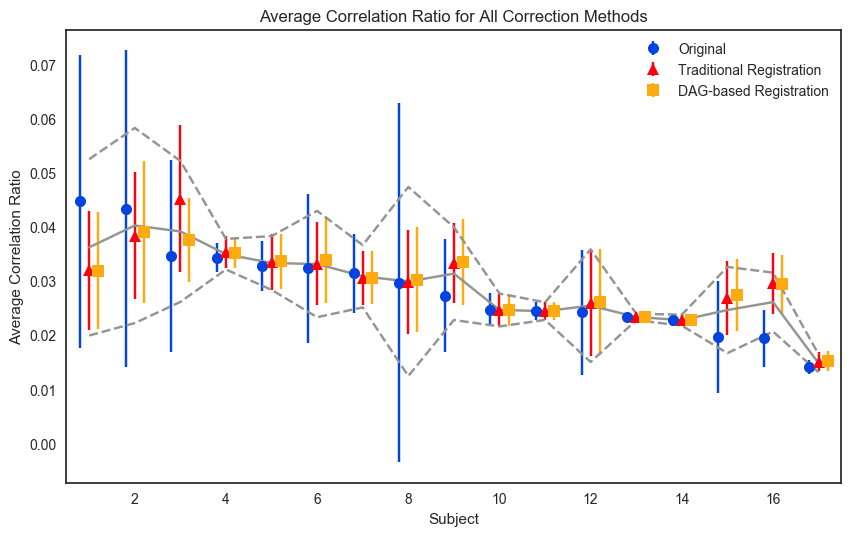

In [16]:
plotCorrelationStatsThree([origMatricesLinearSorted, firstMatricesLinearSorted, dagMatricesLinearSorted], 
                          outFn='figures/boxplot-three.png')

## Plot the correlation ratio stats for the cohort - affine+nonlinear

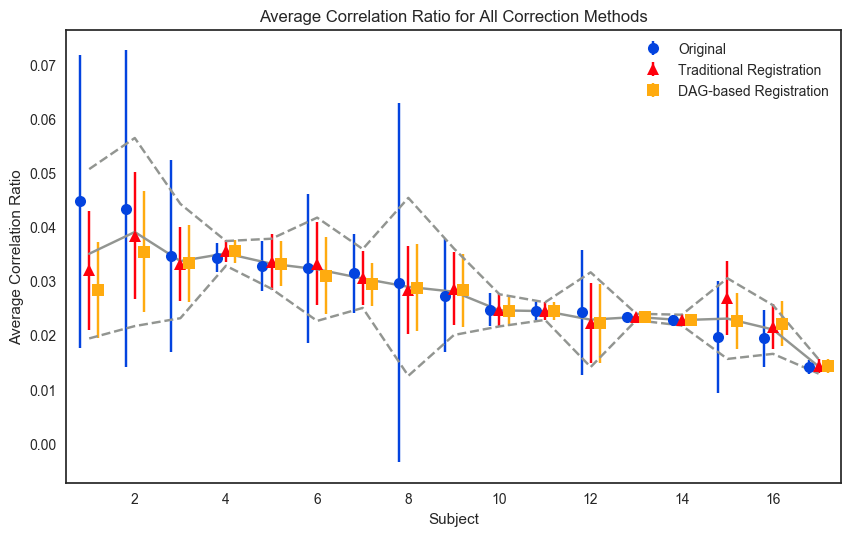

In [17]:
plotCorrelationStatsThree([origMatricesNonlinearSorted, firstMatricesNonlinearSorted, dagMatricesNonlinearSorted],
                         outFn='figures/boxplot-three-nonlinear.png')

Note: at this point, the blue circle lines in the previous 2 graphs should be the same. If they aren't, double check to make sure that the correlation ratio matrices were sorted and passed the check to make sure the linear/nonlinear correlation ratio matrices for the original images were the same.

## Plot the correlation ratio stats for the cohort - affine and affine+nonlinear

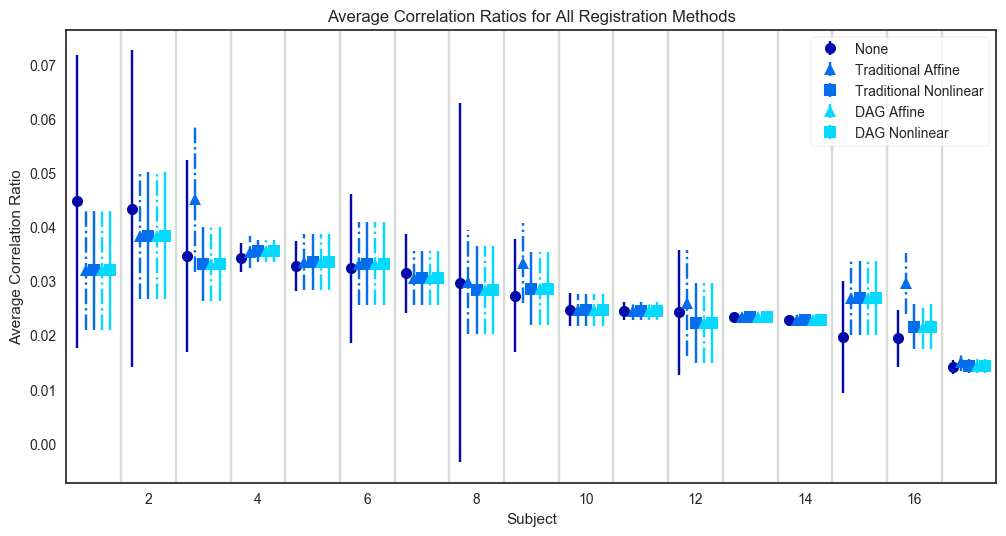

In [18]:
# code here
plotCorrelationStatsFive([origMatricesNonlinearSorted, 
                           firstMatricesLinearSorted,
                           firstMatricesNonlinearSorted,
                           dagMatricesLinearSorted,
                           dagMatricesNonlinearSorted],
                           outFn='figures/boxplot-5.png')


# Generate Correlation Ratio Matrices

Plot the correlation ratio matrices for the best and the worst correlation ratio means.

## Determine the colormap range

In [19]:
# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.extend(origMatricesLinearSorted)
fns.extend(firstMatricesLinearSorted)
fns.extend(dagMatricesLinearSorted)
fns.extend(origMatricesNonlinearSorted)
fns.extend(firstMatricesNonlinearSorted)
fns.extend(dagMatricesNonlinearSorted)

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)

0.0119091 0.314643


## Plot figures with 3 matrices

### Subject 0: Highest original average correlation ratio

#### Affine

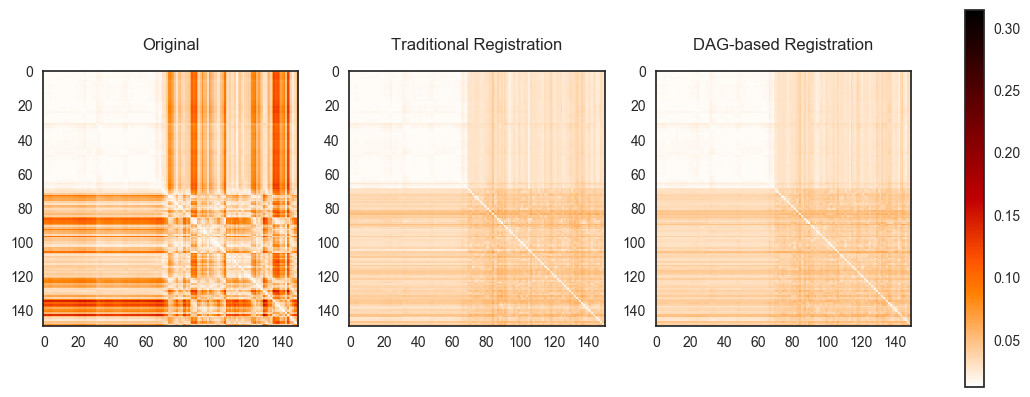

Average cross correlation for each version of motion correction:
  None:             (0.044756910693333325, 0.027066824932752611)
  Traditional:      (0.032030863702222218, 0.010968445820450924)
  DAG-based:        (0.031940666395555553, 0.010823673499286484)


In [18]:
# Subject 0
subjID = 0
saveFn = "figures/correlMatrix-subj00-Linear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original", title2="Traditional Registration",
                         title3="DAG-based Registration",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:            ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Traditional:     ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  DAG-based:       ", calculateCorrelationRatioStats(dagMatricesLinearSorted[subjID]))


#### Affine+nonlinear

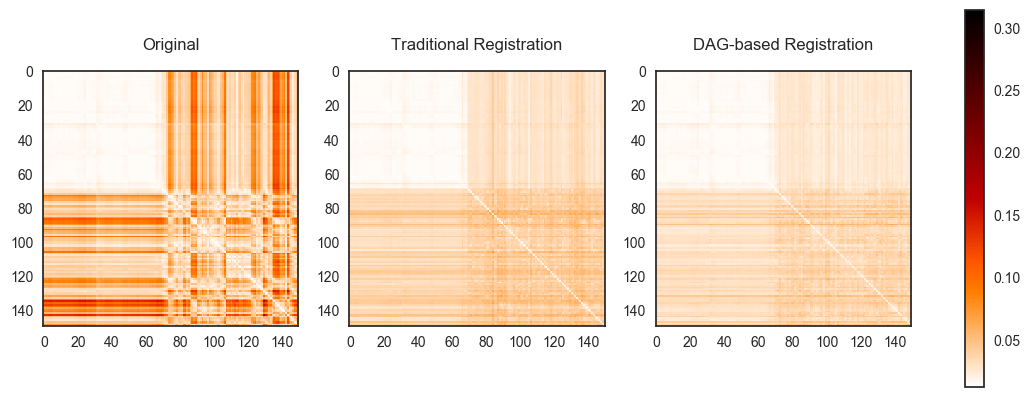

Average cross correlation for each version of motion correction:
  None:             (0.044756910693333325, 0.027066824932752611)
  Traditional:      (0.032030863702222218, 0.010968445820450924)
  DAG-based:        (0.028381370155555554, 0.0088870552637311251)


In [19]:
# Subject 0
subjID = 0
saveFn = "figures/correlMatrix-subj00-Nonlinear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesNonlinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         dagMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original", title2="Traditional Registration",
                         title3="DAG-based Registration",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:            ", calculateCorrelationRatioStats(origMatricesNonlinearSorted[subjID]))
print("  Traditional:     ", calculateCorrelationRatioStats(firstMatricesNonlinearSorted[subjID]))
print("  DAG-based:       ", calculateCorrelationRatioStats(dagMatricesNonlinearSorted[subjID]))


### Subject 7: Median original average correlation ratio

#### Affine

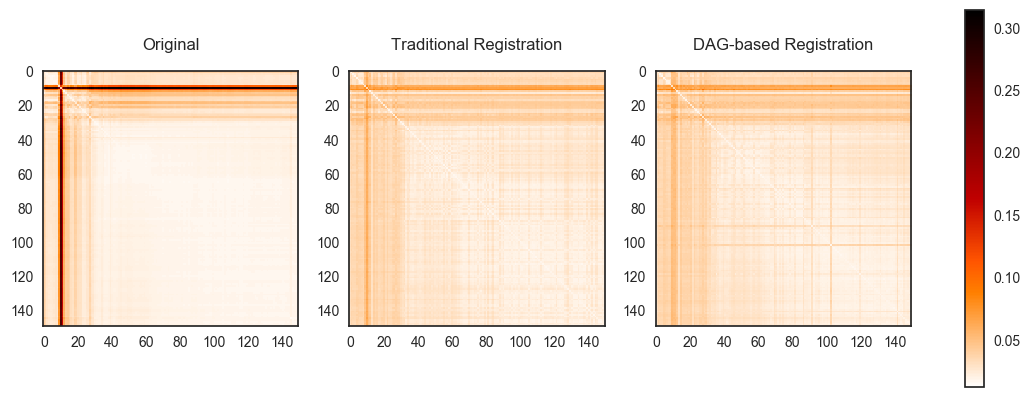

Average cross correlation for each version of motion correction:
  None:             (0.029697818977777776, 0.033137967677094843)
  Traditional:      (0.029855986271111114, 0.0095750235399048485)
  DAG-based:        (0.030254282626666667, 0.0096910745375478561)


In [20]:
# Subject 7
subjID = 7
saveFn = "figures/correlMatrix-subj07-Linear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original", title2="Traditional Registration",
                         title3="DAG-based Registration",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:            ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Traditional:     ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  DAG-based:       ", calculateCorrelationRatioStats(dagMatricesLinearSorted[subjID]))


#### Affine+nonlinear

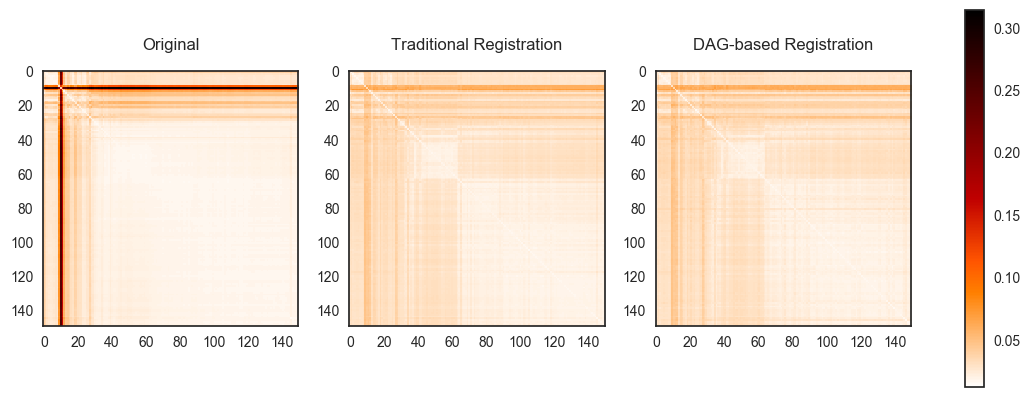

Average cross correlation for each version of motion correction:
  None:             (0.029697818977777776, 0.033137967677094843)
  Traditional:      (0.028373460440000001, 0.0081478562581752834)
  DAG-based:        (0.028773344871111113, 0.0080390805452189157)


In [21]:
# Subject 7
subjID = 7
saveFn = "figures/correlMatrix-subj07-Nonlinear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesNonlinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         dagMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original", title2="Traditional Registration",
                         title3="DAG-based Registration",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:            ", calculateCorrelationRatioStats(origMatricesNonlinearSorted[subjID]))
print("  Traditional:     ", calculateCorrelationRatioStats(firstMatricesNonlinearSorted[subjID]))
print("  DAG-based:       ", calculateCorrelationRatioStats(dagMatricesNonlinearSorted[subjID]))

### Subject 16: Lowest original average correlation ratio

#### Affine

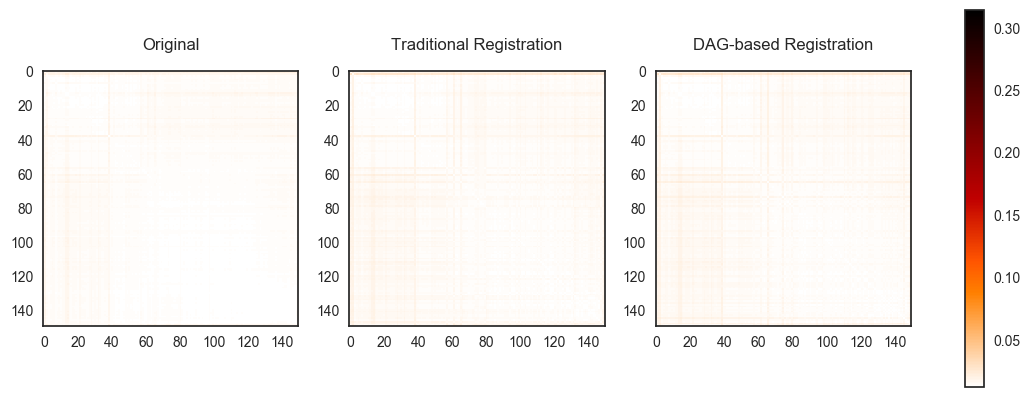

Average cross correlation for each version of motion correction:
  None:             (0.014135785182222223, 0.0013309549421507644)
  Traditional:      (0.01512181852888889, 0.0017762662064697559)
  DAG-based:        (0.015196954248888889, 0.0018419419275387209)


In [22]:
# Subject 16
subjID = 16
saveFn = "figures/correlMatrix-subj16-Linear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original", title2="Traditional Registration",
                         title3="DAG-based Registration",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:            ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Traditional:     ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  DAG-based:       ", calculateCorrelationRatioStats(dagMatricesLinearSorted[subjID]))


#### Affine+nonlinear

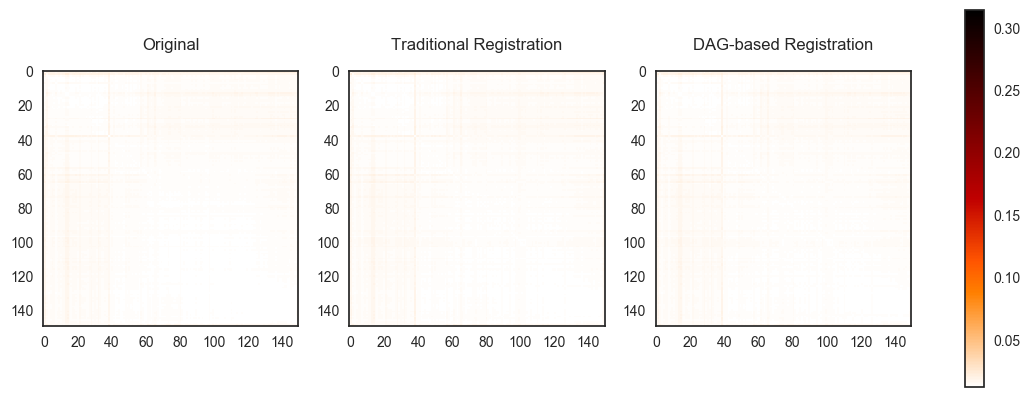

Average cross correlation for each version of motion correction:
  None:             (0.014135785182222223, 0.0013309549421507644)
  Traditional:      (0.014280802360000002, 0.0013242938408546427)
  DAG-based:        (0.014299244422222222, 0.0013174610256191008)


In [23]:
# Subject 16
subjID = 16
saveFn = "figures/correlMatrix-subj16-Nonlinear.png"
cmap = plotCorrelationMatrices3GivenCMapRange(origMatricesNonlinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         dagMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original", title2="Traditional Registration",
                         title3="DAG-based Registration",
                         outFn = saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:            ", calculateCorrelationRatioStats(origMatricesNonlinearSorted[subjID]))
print("  Traditional:     ", calculateCorrelationRatioStats(firstMatricesNonlinearSorted[subjID]))
print("  DAG-based:       ", calculateCorrelationRatioStats(dagMatricesNonlinearSorted[subjID]))


## Plot figures with 5 matrices

Put both the affine/nonlinear correlation ratio matrices and the original correlation ratio matrices in the same figure

### Subject 0: highest original average correlation ratio

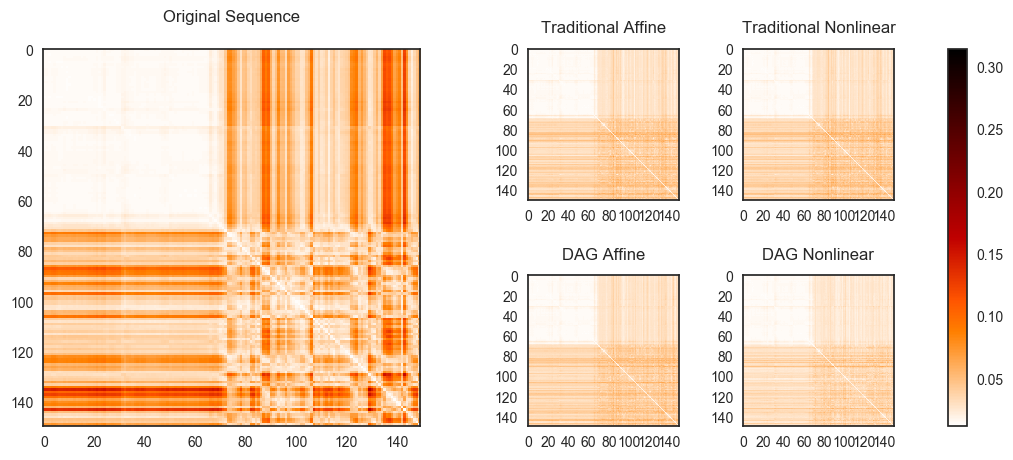

Average cross correlation for each version of motion correction:
  None:                    (0.044756910693333325, 0.027066824932752611)
  Traditional Affine:      (0.032030863702222218, 0.010968445820450924)
  Traditional Nonlinear:   (0.032030863702222218, 0.010968445820450924)
  DAG-based Affine:        (0.031940666395555553, 0.010823673499286484)
  DAG-based Nonlinear:     (0.028381370155555554, 0.0088870552637311251)


In [21]:
# testing the plot 5 correlation matrices function
# Subject 0
subjID = 0
saveFn = "figures/correlMatrix-subj00-All.png"
cmap = plotCorrelationMatrices5GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         dagMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="Traditional Affine",
                         title3="Traditional Nonlinear", title4="DAG Affine",
                         title5="DAG Nonlinear",
                         outFn=saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                   ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Traditional Affine:     ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  Traditional Nonlinear:  ", calculateCorrelationRatioStats(firstMatricesNonlinearSorted[subjID]))
print("  DAG-based Affine:       ", calculateCorrelationRatioStats(dagMatricesLinearSorted[subjID]))
print("  DAG-based Nonlinear:    ", calculateCorrelationRatioStats(dagMatricesNonlinearSorted[subjID]))


### Subject 7: median original average correlation ratio

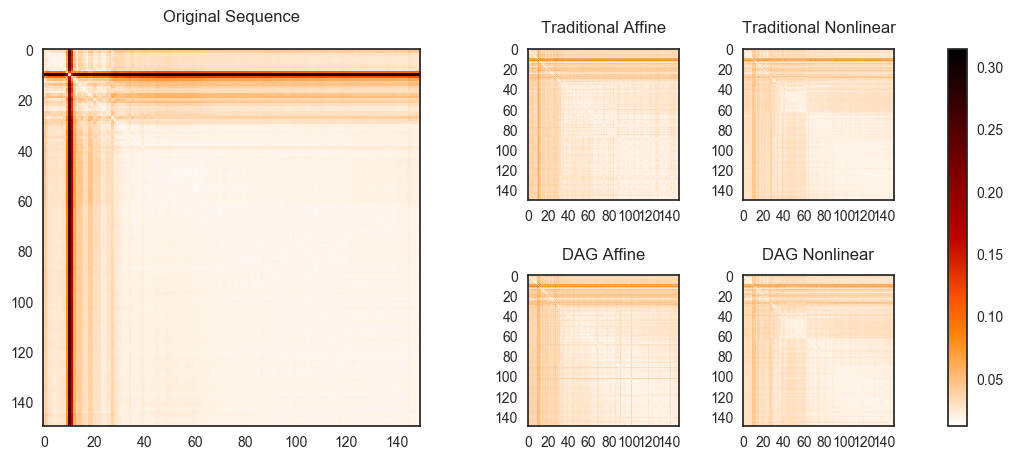

Average cross correlation for each version of motion correction:
  None:                    (0.029697818977777776, 0.033137967677094843)
  Traditional Affine:      (0.029855986271111114, 0.0095750235399048485)
  Traditional Nonlinear:   (0.028373460440000001, 0.0081478562581752834)
  DAG-based Affine:        (0.030254282626666667, 0.0096910745375478561)
  DAG-based Nonlinear:     (0.028773344871111113, 0.0080390805452189157)


In [22]:
# Subject 7
subjID = 7
saveFn = "figures/correlMatrix-subj07-All.png"
cmap = plotCorrelationMatrices5GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         dagMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="Traditional Affine",
                         title3="Traditional Nonlinear", title4="DAG Affine",
                         title5="DAG Nonlinear",
                         outFn=saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                   ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Traditional Affine:     ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  Traditional Nonlinear:  ", calculateCorrelationRatioStats(firstMatricesNonlinearSorted[subjID]))
print("  DAG-based Affine:       ", calculateCorrelationRatioStats(dagMatricesLinearSorted[subjID]))
print("  DAG-based Nonlinear:    ", calculateCorrelationRatioStats(dagMatricesNonlinearSorted[subjID]))

### Subject 16: lowest original average correlation ratio

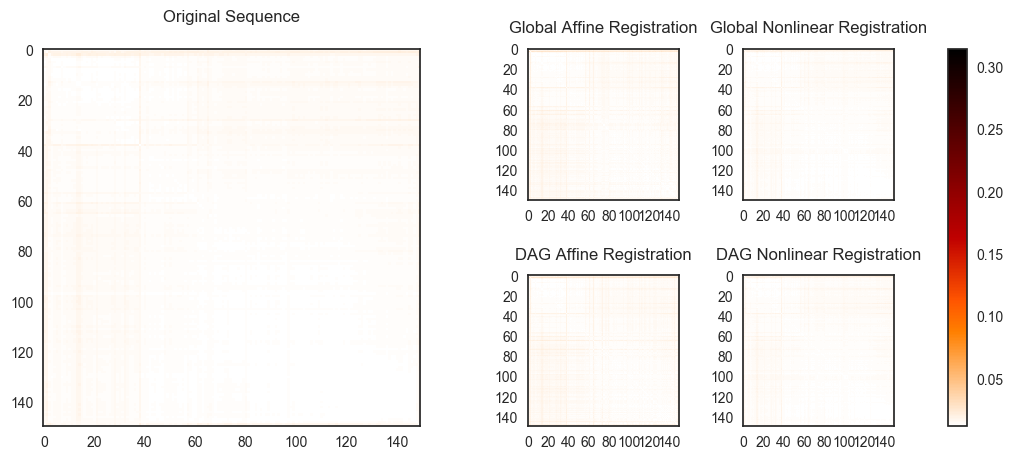

Average cross correlation for each version of motion correction:
  None:                    (0.014135785182222223, 0.0013309549421507644)
  Traditional Affine:      (0.01512181852888889, 0.0017762662064697559)
  Traditional Nonlinear:   (0.014280802360000002, 0.0013242938408546427)
  DAG-based Affine:        (0.015196954248888889, 0.0018419419275387209)
  DAG-based Nonlinear:     (0.014299244422222222, 0.0013174610256191008)


In [26]:
# Subject 16
subjID = 16
saveFn = "figures/correlMatrix-subj16-All.png"
cmap = plotCorrelationMatrices5GivenCMapRange(origMatricesLinearSorted[subjID],
                         firstMatricesLinearSorted[subjID],
                         firstMatricesNonlinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         dagMatricesNonlinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="Traditional Affine Registration",
                         title3="Traditional Nonlinear Registration", title4="DAG Affine Registration",
                         title5="DAG Nonlinear Registration",
                         outFn=saveFn)

print("Average cross correlation for each version of motion correction:")
print("  None:                   ", calculateCorrelationRatioStats(origMatricesLinearSorted[subjID]))
print("  Traditional Affine:     ", calculateCorrelationRatioStats(firstMatricesLinearSorted[subjID]))
print("  Traditional Nonlinear:  ", calculateCorrelationRatioStats(firstMatricesNonlinearSorted[subjID]))
print("  DAG-based Affine:       ", calculateCorrelationRatioStats(dagMatricesLinearSorted[subjID]))
print("  DAG-based Nonlinear:    ", calculateCorrelationRatioStats(dagMatricesNonlinearSorted[subjID]))

# Generate correlation ratio matrix figures to show different types of motion

## Effect Type D: No Effect 

0.0200332 0.0298864


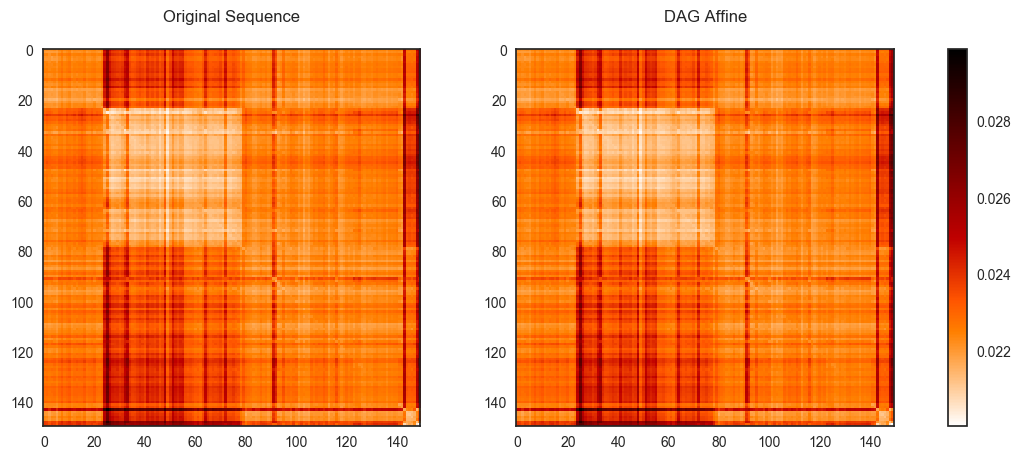

In [70]:
# Subject 13
subjID = 13
saveFn = "figures/motionEffects-correlMat-typeD-013.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)


0.0119091 0.0294727
0.0119091 0.0294727


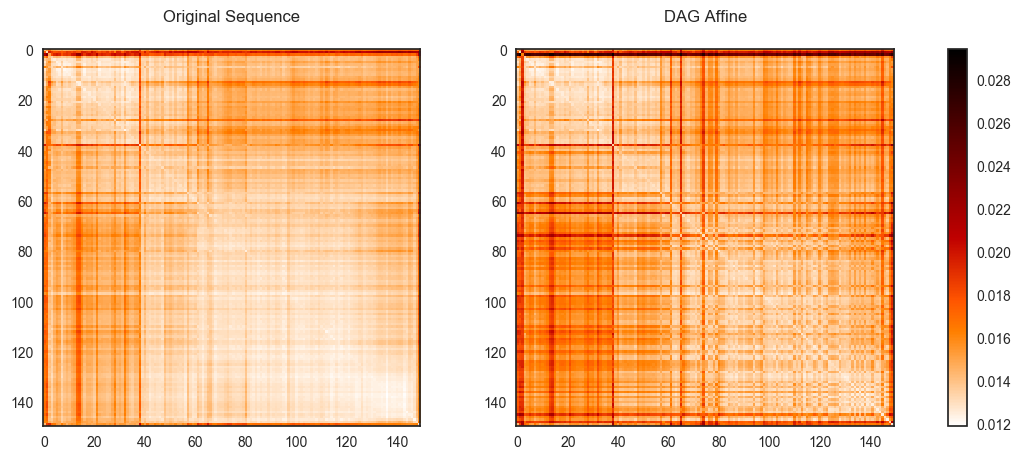

In [71]:
# Subject 16
subjID = 16
saveFn = "figures/motionEffects-correlMat-typeD-016.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)

0.021856 0.0268977


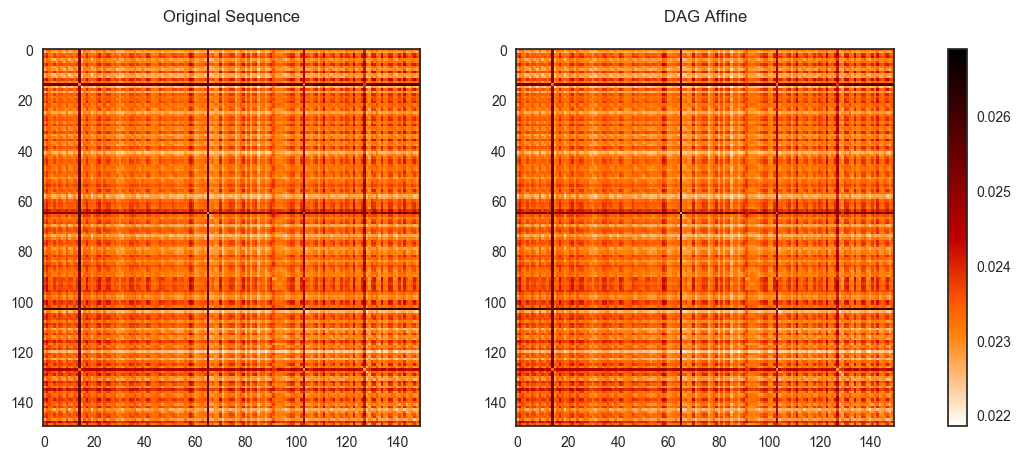

In [72]:
# Subject 12
subjID = 12
saveFn = "figures/motionEffects-correlMat-typeD-012.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)


## Effect Type C: Adverse Effect (increased correlation ratio average)


0.0143406 0.114006
0.0143406 0.114006


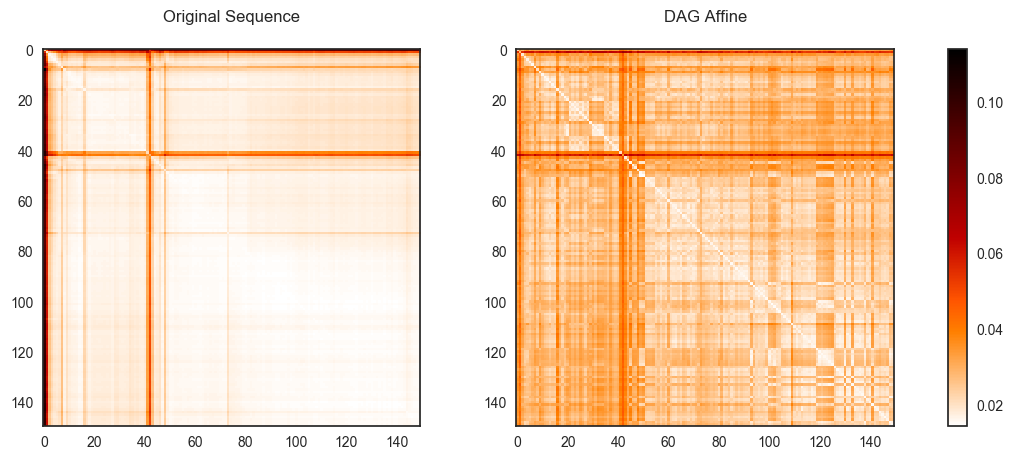

In [73]:
# Subject 14
subjID = 14
saveFn = "figures/motionEffects-correlMat-typeC-014.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)

0.0159514 0.109624
0.0159514 0.109624


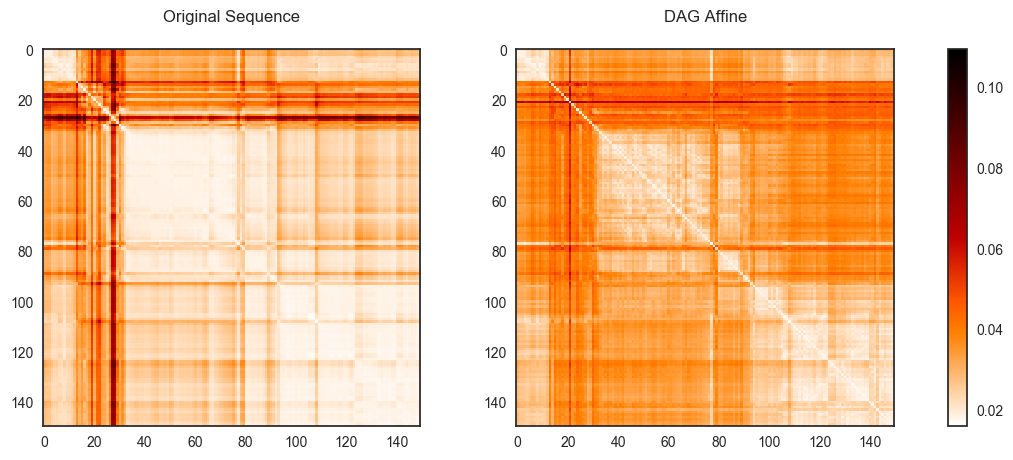

In [74]:
# Subject 8
subjID = 8
saveFn = "figures/motionEffects-correlMat-typeC-008.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)

## Effect Type B: Positive Effect II (standard deviation reduction)

0.0144819 0.0793228


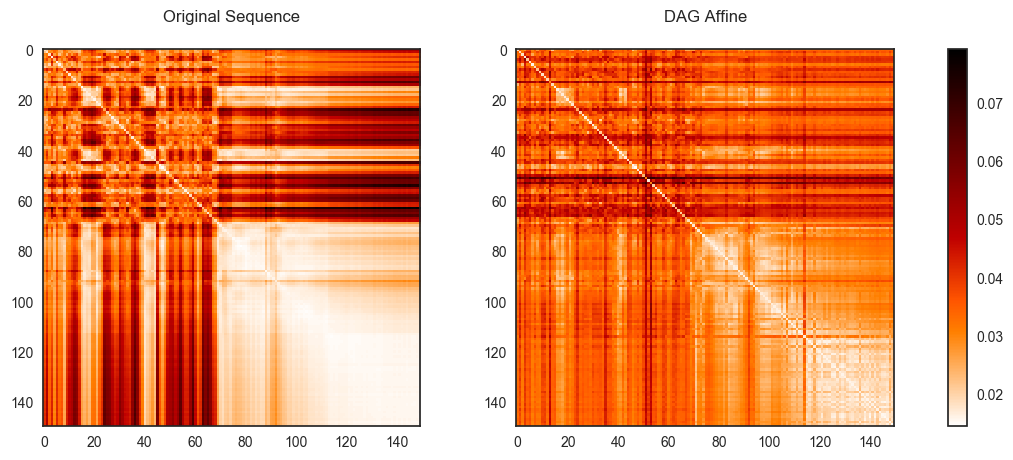

In [75]:
# Subject 5
subjID = 5
saveFn = "figures/motionEffects-correlMat-typeB-005.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)

0.0208601 0.0761032


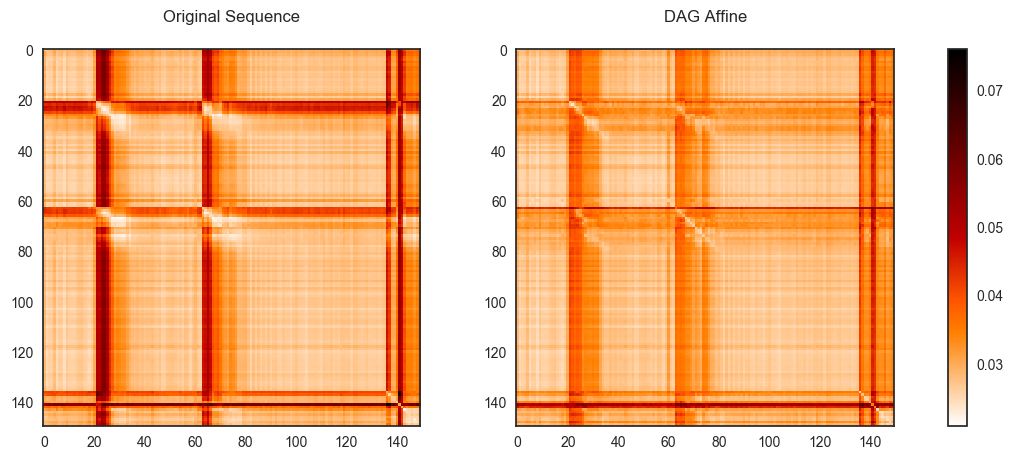

In [76]:
# Subject 6
subjID = 6
saveFn = "figures/motionEffects-correlMat-typeB-006.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)

## Effect Type A: Positive Effect I (reduction in mean and standard deviation)

0.0160261 0.314643


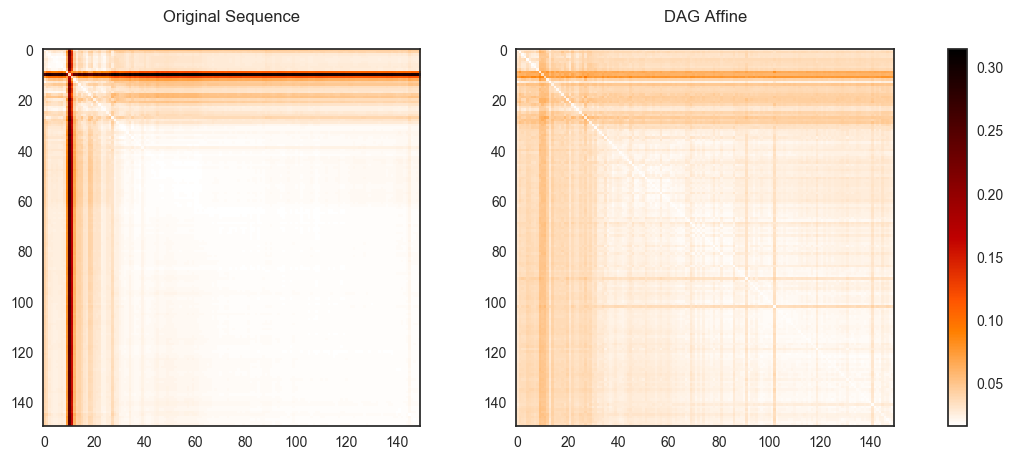

In [77]:
# Subject 7
subjID = 7
saveFn = "figures/motionEffects-correlMat-typeA-007.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)

0.0124786 0.227523


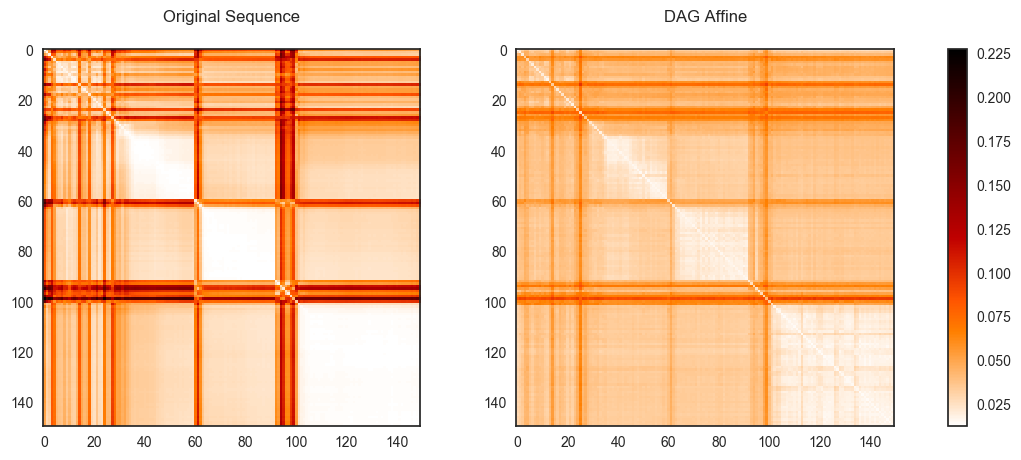

In [78]:
# Subject 1
subjID = 1
saveFn = "figures/motionEffects-correlMat-typeA-001.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)

0.012409 0.17355


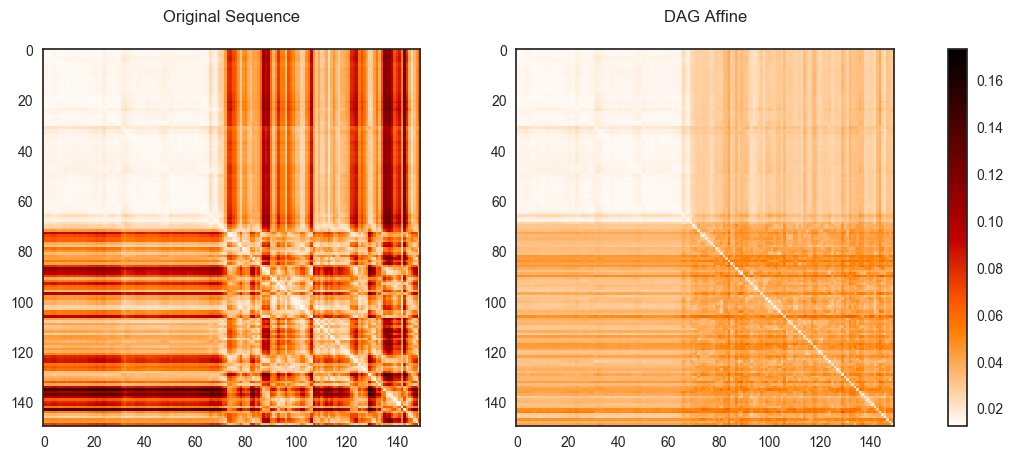

In [79]:
# Subject 0
subjID = 0
saveFn = "figures/motionEffects-correlMat-typeA-000.png"

# Calculate range for the colormap

minVal = 10.0
maxVal = 0.0

fns = []
fns.append(origMatricesLinearSorted[subjID])
fns.append(firstMatricesLinearSorted[subjID])
fns.append(dagMatricesLinearSorted[subjID])
fns.append(firstMatricesNonlinearSorted[subjID])
fns.append(dagMatricesNonlinearSorted[subjID])

for f in fns:
    mat = np.loadtxt(open(f, 'r'), delimiter=',')

    # calculate the vmin and vmax
    localMin = mat.min()
    localMax = mat.max()
    
    # compare to global min and max
    if localMin < minVal:
        minVal = localMin
        
    if localMax > maxVal:
        maxVal = localMax
    
    
print(minVal, maxVal)
    
cmap = plotCorrelationMatrices2GivenCMapRange(origMatricesLinearSorted[subjID],
                         dagMatricesLinearSorted[subjID],
                         minVal, maxVal,
                         title1="Original Sequence", title2="DAG Affine",
                         outFn=saveFn)

## Before/After Registration Correlation Ratio Statistics Plots

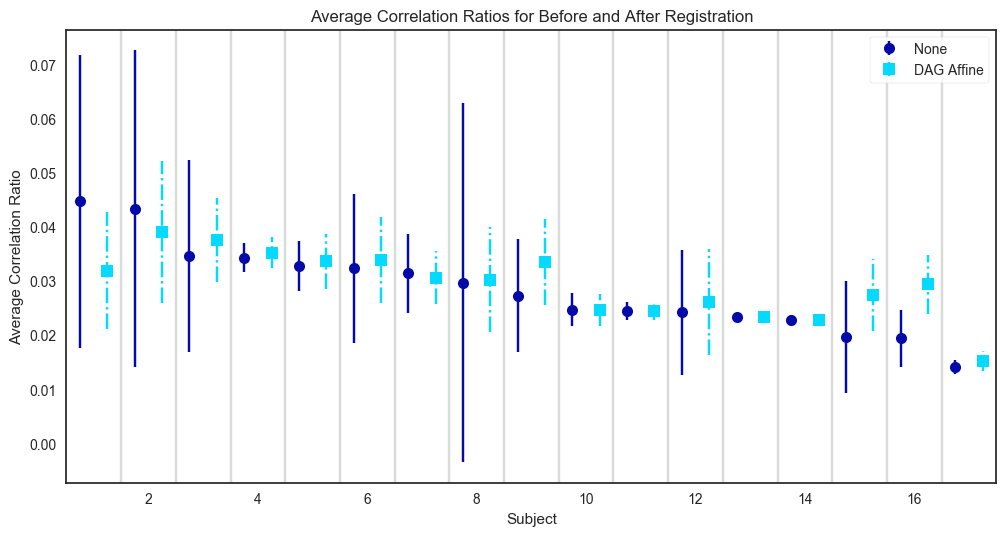

In [51]:
plotCorrelationStatsTwo([origMatricesNonlinearSorted, 
                           dagMatricesLinearSorted],
                           outFn='figures/boxplot-2.png')